## Upscaling validation
In this notebool, a small dataset will be created to se if the CDO operation works well

In [2]:
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
import xarray as xr

path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/Downscaling_CM/dev/NilsCha/utils"
os.chdir(path)
import dataset

In [8]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/HadGEM_driven_COSMO/Present/2003"
os.chdir(path)
filenames = dataset.getfiles()
print(filenames[0:24])

['lffd20030101000000.nc', 'lffd20030101010000.nc', 'lffd20030101020000.nc', 'lffd20030101030000.nc', 'lffd20030101040000.nc', 'lffd20030101050000.nc', 'lffd20030101060000.nc', 'lffd20030101070000.nc', 'lffd20030101080000.nc', 'lffd20030101090000.nc', 'lffd20030101100000.nc', 'lffd20030101110000.nc', 'lffd20030101120000.nc', 'lffd20030101130000.nc', 'lffd20030101140000.nc', 'lffd20030101150000.nc', 'lffd20030101160000.nc', 'lffd20030101170000.nc', 'lffd20030101180000.nc', 'lffd20030101190000.nc', 'lffd20030101200000.nc', 'lffd20030101210000.nc', 'lffd20030101220000.nc', 'lffd20030101230000.nc']


Let's take a random week to upscale

In [9]:
rand_week_2km = dataset.new_dataset(filenames, 172, 179)
rand_week_2km

<xarray.Dataset>
Dimensions:     (time: 168, rlon: 1542, rlat: 1542)
Coordinates:
  * time        (time) datetime64[ns] 2003-06-22 ... 2003-06-28T23:00:00
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
    lon         (rlat, rlon) float32 -11.06 -11.04 -11.02 ... 34.27 34.31 34.34
    lat         (rlat, rlon) float32 29.61 29.61 29.62 29.62 ... 61.11 61.1 61.1
    height_2m   float32 2.0
    height_10m  float32 10.0
Data variables:
    T_2M        (time, rlat, rlon) float32 293.9 293.9 293.9 ... 279.8 279.8
    RELHUM_2M   (time, rlat, rlon) float32 79.83 79.32 79.08 ... 96.73 96.76
    TOT_PR      (time, rlat, rlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

Once the dataset is saved, we open the upscaled version to see if it is really upscalled

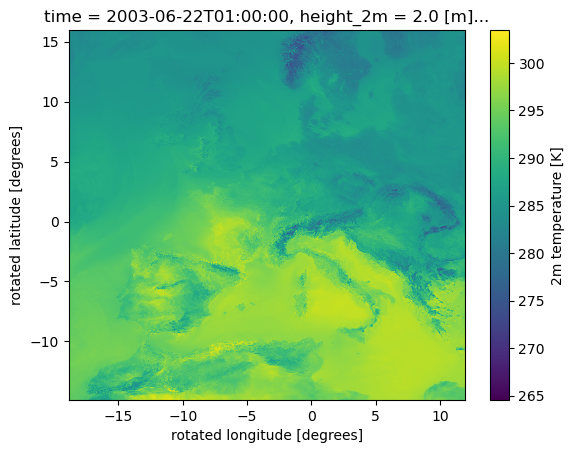

In [10]:
rand_week_2km.T_2M.isel(time=1).plot()

In [12]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/Downscaling_CM/dev/NilsCha/data"
os.chdir(path)
filename = './random_week_2km.nc'
print ('saving to ', filename)
rand_week_2km.to_netcdf(path=filename)
rand_week_2km.close()
print ('finished saving')

saving to  ./random_week_2km.nc
finished saving


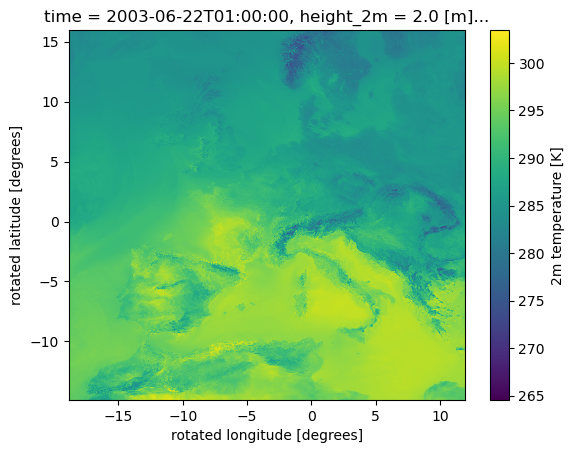

In [13]:
week_2km = xr.open_dataset("random_week_2km.nc")
week_2km.T_2M.isel(time=1).plot()

In [14]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/Downscaling_CM/dev/NilsCha/data"
os.chdir(path)
rand_week_12km = xr.open_dataset("week_12km.nc")
rand_week_12km

<xarray.Dataset>
Dimensions:     (time: 168, rlat: 257, rlon: 257)
Coordinates:
  * time        (time) datetime64[ns] 2003-06-22 ... 2003-06-28T23:00:00
    height_2m   float32 ...
    height_10m  float32 ...
  * rlon        (rlon) float64 -18.86 -18.74 -18.62 -18.5 ... 11.62 11.74 11.86
  * rlat        (rlat) float64 -14.86 -14.74 -14.62 -14.5 ... 15.62 15.74 15.86
Data variables:
    T_2M        (time, rlat, rlon) float64 ...
    RELHUM_2M   (time, rlat, rlon) float64 ...
    TOT_PR      (time, rlat, rlon) float64 ...
Attributes:
    regrid_method:  conservative

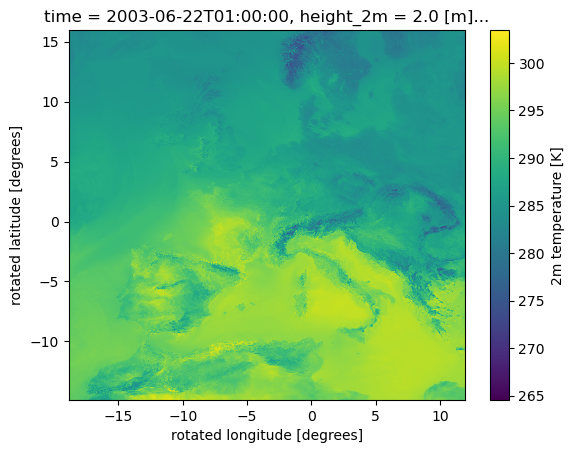

In [15]:
rand_week_2km.T_2M.isel(time=1).plot()

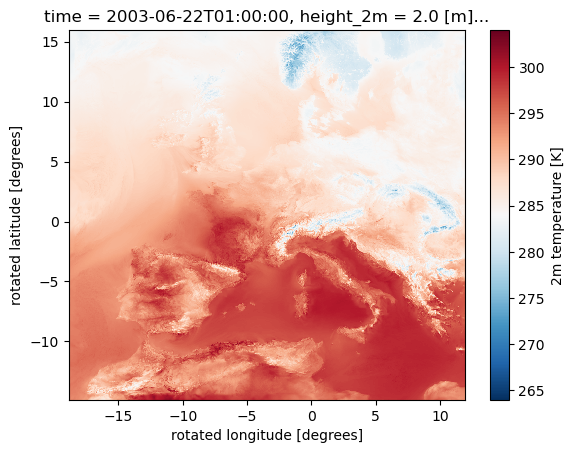

In [16]:
rand_week_2km.T_2M.isel(time=1).plot(vmin = 264, vmax = 304, cmap='RdBu_r')

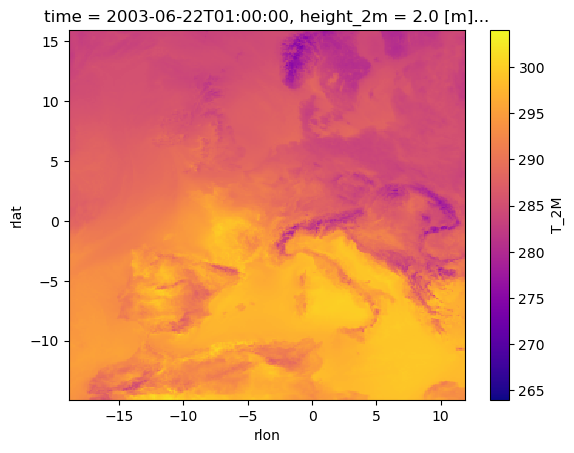

In [17]:
rand_week_12km.T_2M.isel(time=1).plot(vmin = 264, vmax = 304, cmap='plasma')

We clearly see the loss of information, mostly on montainous regions

In [18]:
lat_bnd = [5, 15]
lon_bnd = [0, 5]

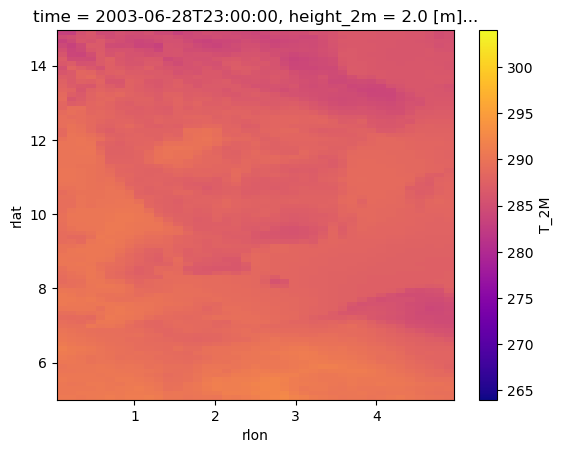

In [19]:
rand_week_12km.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time=-1).plot(vmin = 264, vmax = 304, cmap='plasma')